## 01 - EDA

Análisis de empleado.

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

import re

import pylab as plt
import seaborn as sns
%matplotlib inline

## Carga de datos y limpieza

In [2]:
data=pd.read_csv('../data/HR_dataset.csv')

data.head()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/85,32.0,Female,Married,US Citizen,No,Black or African American,10/27/08,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/84,33.0,Male,Divorced,US Citizen,No,Black or African American,1/6/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/86,31.0,Male,Single,US Citizen,No,White,9/29/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/85,32.0,Female,Married,US Citizen,No,White,2/16/15,4/15/15,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/88,29.0,Female,Single,US Citizen,No,White,5/1/15,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [3]:
data.columns=[re.sub(r'(?<!^)(?=[A-Z])', '_', e).lower().replace('/', '').replace(' ', '').replace('dateof', 'date_of') 
              for e in data.columns]

data.head()

,employee_name,employee_number,state,zip,d_o_b,age,sex,marital_desc,citizen_desc,hispanic_latino,race_desc,date_of_hire,date_of_termination,reason_for_term,employment_status,department,position,pay_rate,manager_name,employee_source,performance_score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/85,32.0,Female,Married,US Citizen,No,Black or African American,10/27/08,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/84,33.0,Male,Divorced,US Citizen,No,Black or African American,1/6/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/86,31.0,Male,Single,US Citizen,No,White,9/29/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/85,32.0,Female,Married,US Citizen,No,White,2/16/15,4/15/15,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/88,29.0,Female,Single,US Citizen,No,White,5/1/15,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   employee_name        301 non-null    object 
 1   employee_number      301 non-null    float64
 2   state                301 non-null    object 
 3   zip                  301 non-null    float64
 4   d_o_b                301 non-null    object 
 5   age                  301 non-null    float64
 6   sex                  301 non-null    object 
 7   marital_desc         301 non-null    object 
 8   citizen_desc         301 non-null    object 
 9   hispanic_latino      301 non-null    object 
 10  race_desc            301 non-null    object 
 11  date_of_hire         301 non-null    object 
 12  date_of_termination  103 non-null    object 
 13  reason_for_term      301 non-null    object 
 14  employment_status    301 non-null    object 
 15  department           301 non-null    obj

In [5]:
data.isna().sum()

employee_name            1
employee_number          1
state                    1
zip                      1
d_o_b                    1
age                      1
sex                      1
marital_desc             1
citizen_desc             1
hispanic_latino          1
race_desc                1
date_of_hire             1
date_of_termination    199
reason_for_term          1
employment_status        1
department               1
position                 1
pay_rate                 1
manager_name             1
employee_source          1
performance_score        1
dtype: int64

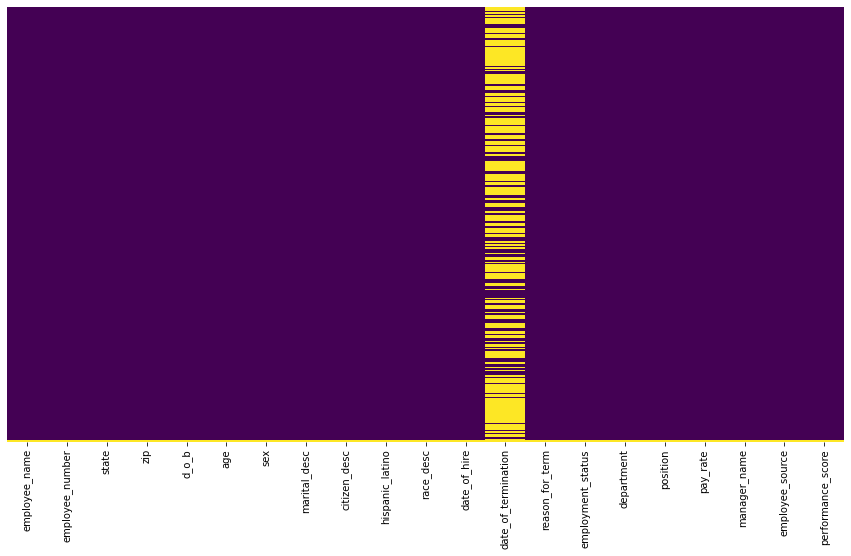

In [6]:
# grafico de nulos en el dataframe

plt.figure(figsize=(15, 8))

sns.heatmap(data.isna(),  # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False);

In [7]:
data.dropna(how='all', axis=0, inplace=True)

In [8]:
data.shape

(301, 21)

In [9]:
data.sex.unique()

array(['Female', 'Male', 'male'], dtype=object)

In [10]:
data.sex.replace('male','Male', inplace=True)

data.sex.unique()

array(['Female', 'Male'], dtype=object)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   employee_name        301 non-null    object 
 1   employee_number      301 non-null    float64
 2   state                301 non-null    object 
 3   zip                  301 non-null    float64
 4   d_o_b                301 non-null    object 
 5   age                  301 non-null    float64
 6   sex                  301 non-null    object 
 7   marital_desc         301 non-null    object 
 8   citizen_desc         301 non-null    object 
 9   hispanic_latino      301 non-null    object 
 10  race_desc            301 non-null    object 
 11  date_of_hire         301 non-null    object 
 12  date_of_termination  103 non-null    object 
 13  reason_for_term      301 non-null    object 
 14  employment_status    301 non-null    object 
 15  department           301 non-null    obj

In [12]:
data.fillna(0, inplace=True)

## Salarios

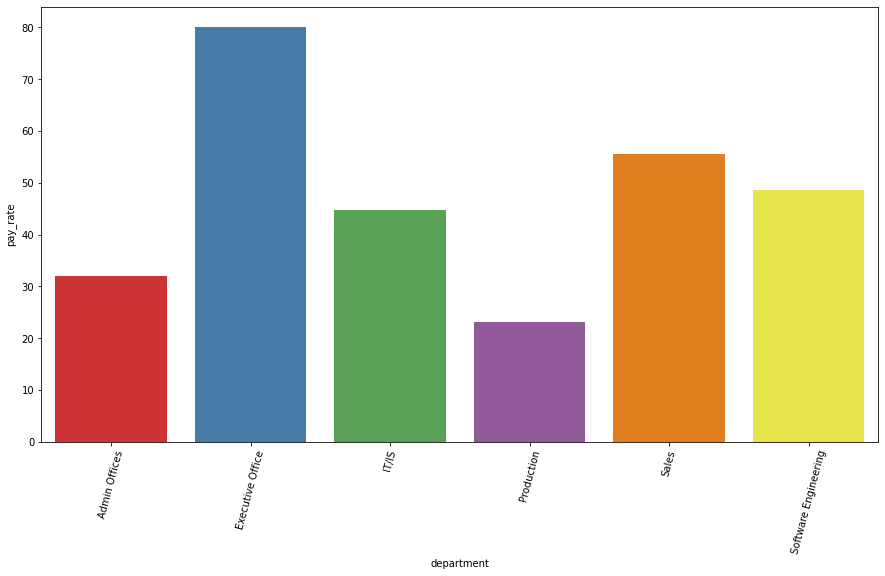

In [66]:
# salarios por departamento

data.department=data.department.apply(lambda x: x.strip())

plt.figure(figsize=(15, 8))

sns.barplot(x='department', y='pay_rate', data=data, palette='Set1', ci=None)
plt.xticks(rotation=75);

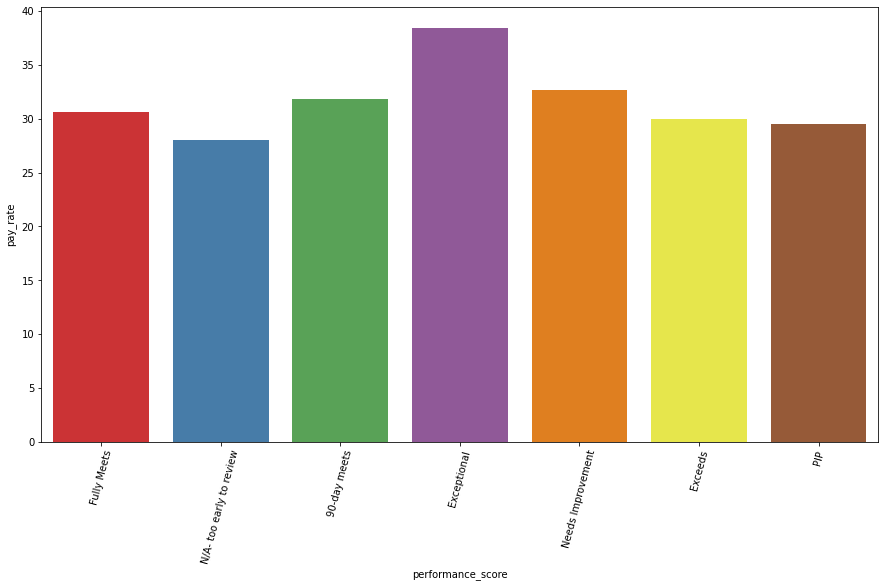

In [13]:
# salarios por performance

plt.figure(figsize=(15, 8))

sns.barplot(x='performance_score', y='pay_rate', data=data, palette='Set1', ci=None)
plt.xticks(rotation=75);

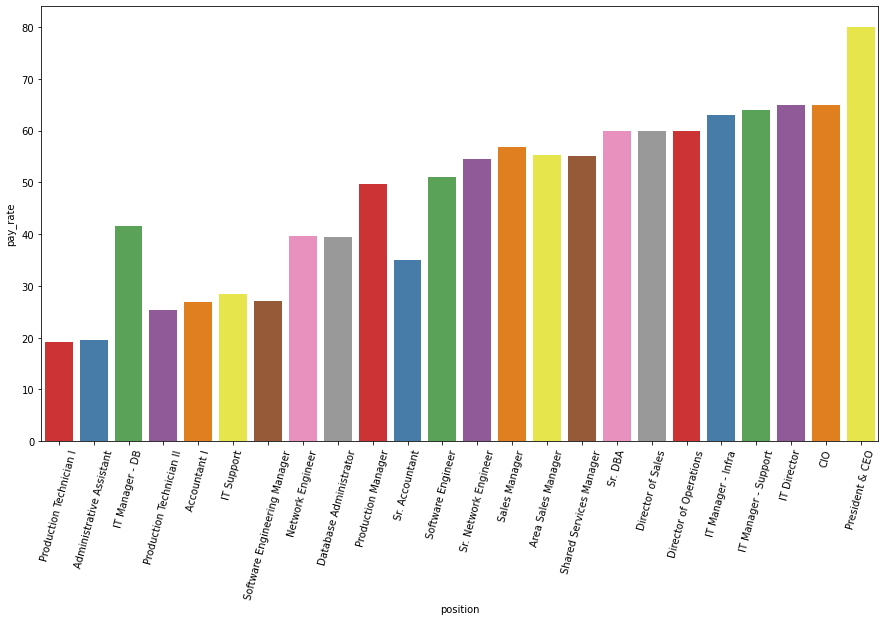

In [18]:
# salarios por posicion


sort_data=data.sort_values('pay_rate').reset_index(drop=True)

plt.figure(figsize=(15, 8))

sns.barplot(x='position', y='pay_rate', data=sort_data, palette='Set1', ci=None)
plt.xticks(rotation=75);

## Diversidad

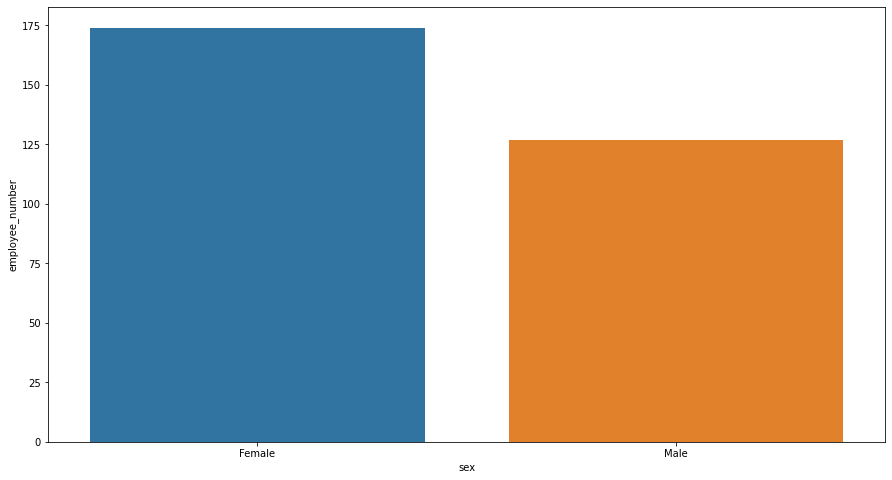

In [15]:
# genero

plt.figure(figsize=(15, 8))

sns.barplot(x='sex', y='employee_number', data=data.groupby('sex').count().reset_index(), ci=None);

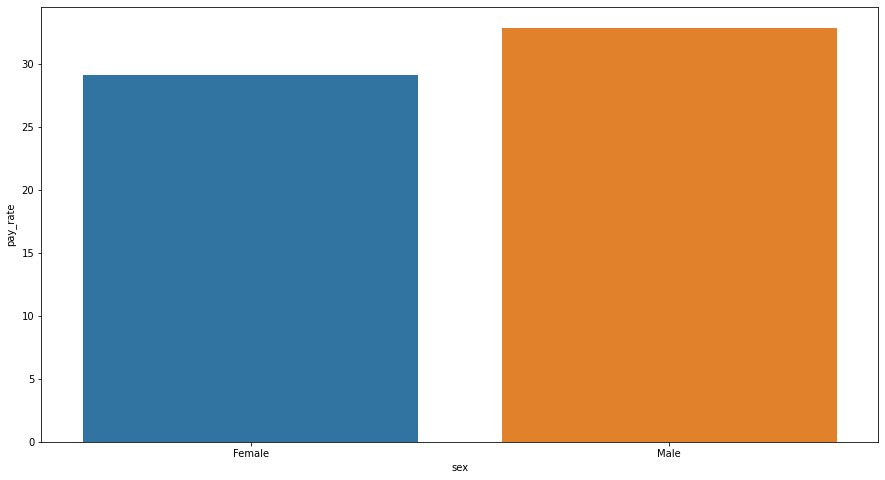

In [16]:
# salarios por genero


plt.figure(figsize=(15, 8))

sns.barplot(x='sex', y='pay_rate', data=data, ci=None);

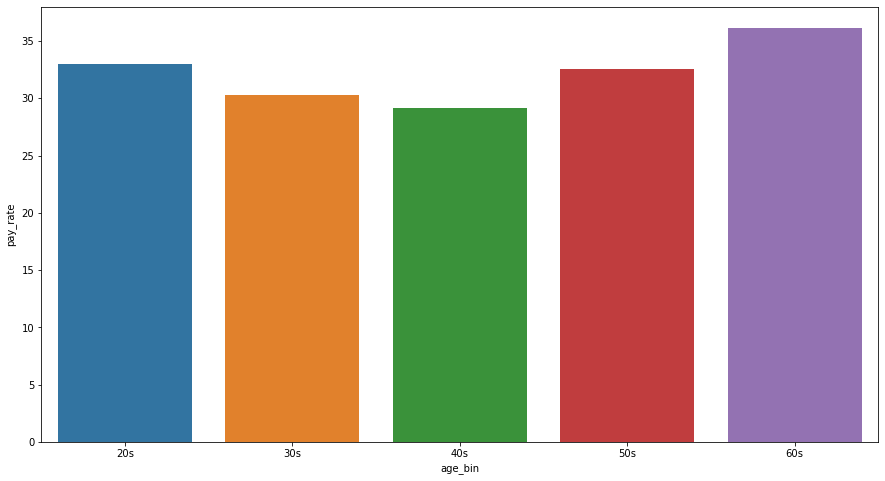

In [44]:
# salarios rangos de edad

data['age_bin']=pd.cut(x=data.age, bins=[20, 29, 39, 49, 59, 69])  # binning

plt.figure(figsize=(15, 8))

sns.barplot(x='age_bin', y='pay_rate', data=data, ci=None)

plt.xticks([0, 1, 2, 3, 4], ['20s', '30s', '40s', '50s', '60s']);

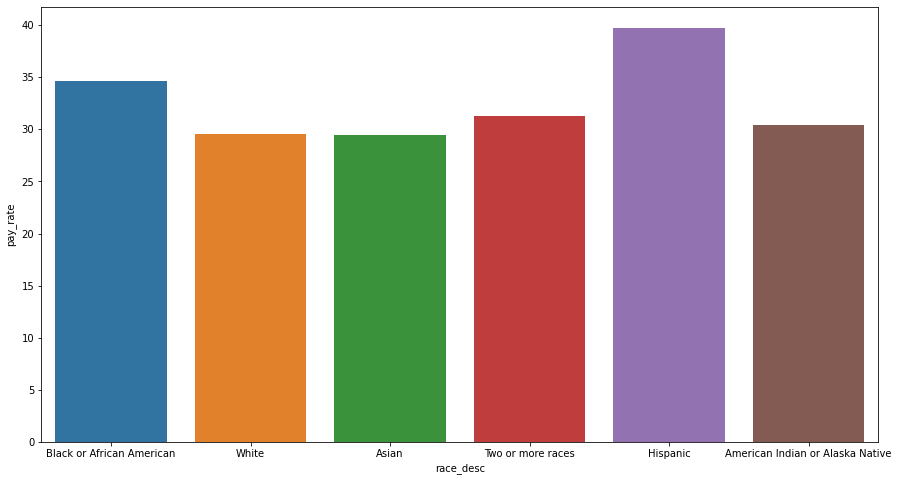

In [68]:
# salarios segun etnia 

plt.figure(figsize=(15, 8))

sns.barplot(x='race_desc', y='pay_rate', data=data, ci=None);

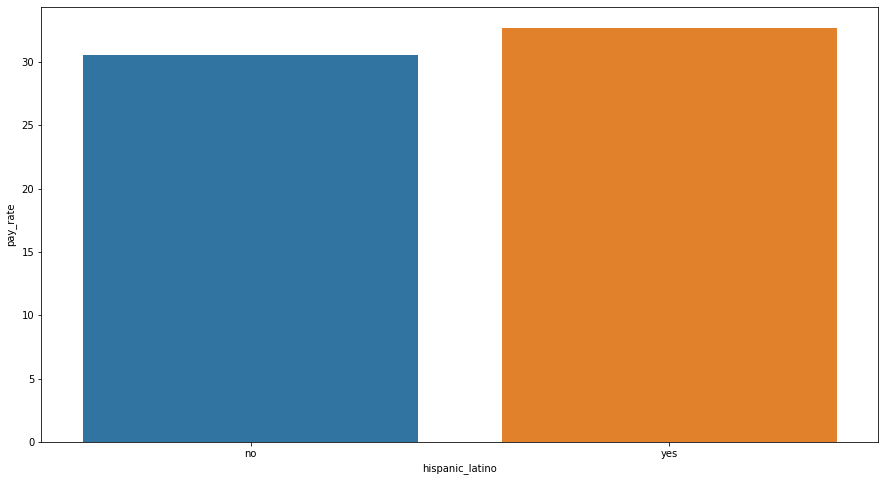

In [57]:
# salarios segun etnia (latinos)

data.hispanic_latino=data.hispanic_latino.str.lower()

plt.figure(figsize=(15, 8))

sns.barplot(x='hispanic_latino', y='pay_rate', data=data, ci=None);

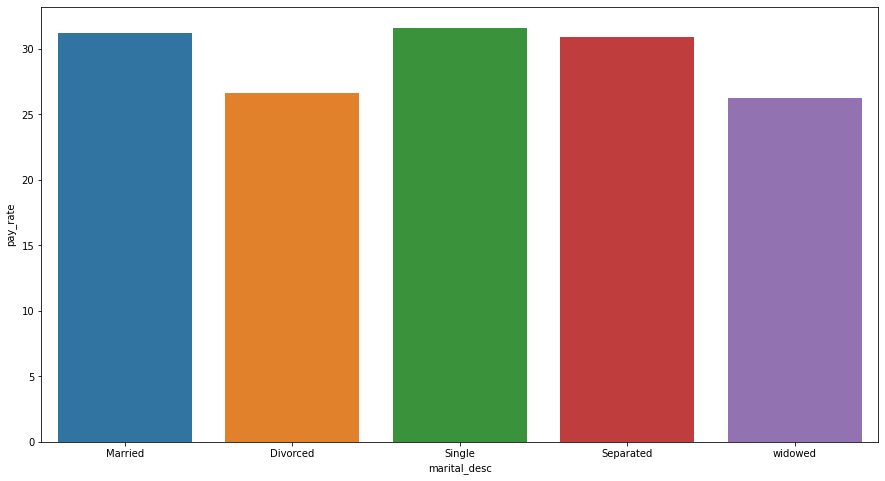

In [69]:
# salarios segun estado civil

plt.figure(figsize=(15, 8))

sns.barplot(x='marital_desc', y='pay_rate', data=data, ci=None);

## Managers

In [60]:

data.groupby('manager_name').count()

,employee_name,employee_number,state,zip,d_o_b,age,sex,marital_desc,citizen_desc,hispanic_latino,race_desc,date_of_hire,date_of_termination,reason_for_term,employment_status,department,position,pay_rate,employee_source,performance_score,age_bin
manager_name,,,,,,,,,,,,,,,,,,,,,
Alex Sweetwater,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Amy Dunn,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Board of Directors,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Brandon R. LeBlanc,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Brannon Miller,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
David Stanley,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Debra Houlihan,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Elijiah Gray,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Eric Dougall,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [61]:
data

,employee_name,employee_number,state,zip,d_o_b,age,sex,marital_desc,citizen_desc,hispanic_latino,race_desc,date_of_hire,date_of_termination,reason_for_term,employment_status,department,position,pay_rate,manager_name,employee_source,performance_score,age_bin
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/85,32.0,Female,Married,US Citizen,no,Black or African American,10/27/08,0,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets,"(29, 39]"
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/84,33.0,Male,Divorced,US Citizen,no,Black or African American,1/6/14,0,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,"(29, 39]"
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/86,31.0,Male,Single,US Citizen,no,White,9/29/14,0,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets,"(29, 39]"
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/85,32.0,Female,Married,US Citizen,no,White,2/16/15,4/15/15,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review,"(29, 39]"
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/88,29.0,Female,Single,US Citizen,no,White,5/1/15,0,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review,"(20, 29]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,"Patronick, Luke",1.112031e+09,MA,1844.0,2/20/79,38.0,Male,Single,US Citizen,no,Asian,11/7/11,9/7/15,Another position,Voluntarily Terminated,Software Engineering,Software Engineer,52.25,Alex Sweetwater,Diversity Job Fair,Exceeds,"(29, 39]"
297,"Saada, Adell",1.012023e+09,MA,2132.0,7/24/86,31.0,Female,Married,US Citizen,no,White,11/5/12,0,N/A - still employed,Active,Software Engineering,Software Engineer,49.25,Alex Sweetwater,Pay Per Click - Google,Fully Meets,"(29, 39]"
298,"Szabo, Andrew",1.201031e+09,MA,2140.0,5/6/83,34.0,Male,Single,US Citizen,no,White,7/7/14,0,N/A - still employed,Active,Software Engineering,Software Engineer,48.00,Alex Sweetwater,MBTA ads,Exceptional,"(29, 39]"
299,"True, Edward",1.102024e+09,MA,2451.0,6/14/83,34.0,Male,Single,Non-Citizen,no,Black or African American,2/18/13,4/15/14,medical issues,Voluntarily Terminated,Software Engineering,Software Engineer,45.42,Alex Sweetwater,Diversity Job Fair,Fully Meets,"(29, 39]"
